# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [1]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [4]:
# cada linha é uma pessoa
# dados quantitativos descritivos: Idade
# dados quantitativos continuos: Renda, Altura
# dados qualitativos nominais: UF, Sexo, Cor
# dados qualitativos ordinais: Anos de Estudo

#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [5]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [6]:
df_uf = dados['UF'].value_counts().reset_index()
df_uf

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


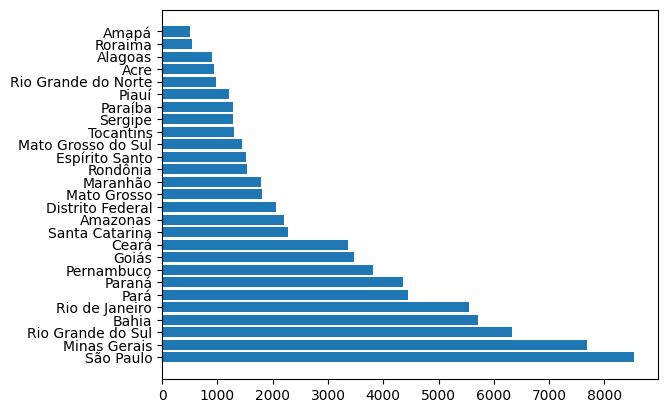

In [7]:
plt.barh(df_uf['UF'], df_uf['count'])
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [8]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

In [9]:
df = dados

In [10]:
df.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


##### Sexo

In [11]:
df['Sexo Indicador'] = pd.Categorical(
    df['Sexo'],
    categories = [0, 1],
    ordered = False
)

In [12]:
df.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo Indicador
0,Rondônia,0,23,8,12,800,1.60,0
1,Rondônia,1,23,2,12,1150,1.74,1
2,Rondônia,1,35,8,15,880,1.76,1
3,Rondônia,0,46,2,6,3500,1.78,0
4,Rondônia,1,47,8,9,150,1.69,1


In [13]:
df['Sexo Indicador'] = df['Sexo Indicador'].map(sexo)

In [14]:
df[['Sexo Indicador', 'Sexo']].drop_duplicates()

,Sexo Indicador,Sexo
0,Masculino,0
1,Feminino,1


##### Cor

In [15]:
df['Cor Indicador'] = pd.Categorical(
    df['Cor'],
    categories = [0, 2, 4, 6, 8],
    ordered = False
)
df['Cor Indicador'] = df['Cor Indicador'].map(cor)

In [16]:
df[['Cor Indicador', 'Cor']].drop_duplicates()

,Cor Indicador,Cor
0,Parda,8
1,Branca,2
8,Preta,4
35,Amarela,6
659,Indígena,0


##### Anos de Estudo

In [17]:
df['Anos.de.Estudo Indicador'] = pd.Categorical(
    df['Anos.de.Estudo'],
    categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17],
    ordered = True
)

In [18]:
df['Anos.de.Estudo Indicador'] = df['Anos.de.Estudo Indicador'].map(anos_de_estudo)

In [19]:
df[['Anos.de.Estudo Indicador', 'Anos.de.Estudo']].drop_duplicates().sort_values(by='Anos.de.Estudo')

,Anos.de.Estudo Indicador,Anos.de.Estudo
20,Sem instrução e menos de 1 ano,1
43,1 ano,2
37,2 anos,3
49,3 anos,4
22,4 anos,5
3,5 anos,6
36,6 anos,7
50,7 anos,8
4,8 anos,9
16,9 anos,10


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [20]:
print(f"A renda da amostra vai de R$ {min(dados['Renda']):,.2f} a R$ {max(dados['Renda']):,.2f}")

A renda da amostra vai de R$ 0.00 a R$ 200,000.00


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [21]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo Indicador,Cor Indicador,Anos.de.Estudo Indicador
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [22]:
dados.columns = ['UF', 'Sexo', 'Idade',	'Cor', 'Anos.de.Estudo',	'Renda',	'Altura',	'Cat.Sexo',	'Cat.Cor', 'Cat.Anos.de.Estudo']

In [23]:
tab_freq_sexo = (dados.groupby(dados['Cat.Sexo'], observed=True)
                      .size()
                      .reset_index(name='Freq_absoluta')
                      .sort_values(by='Freq_absoluta', ascending=True))
tab_freq_sexo

,Cat.Sexo,Freq_absoluta
1,Feminino,23590
0,Masculino,53250


In [24]:
tab_freq_sexo['Freq_relativa'] = round(tab_freq_sexo['Freq_absoluta']/tab_freq_sexo['Freq_absoluta'].sum(), 1)*100
tab_freq_sexo

,Cat.Sexo,Freq_absoluta,Freq_relativa
1,Feminino,23590,30.0
0,Masculino,53250,70.0


In [25]:
tab_freq_sexo.columns = ['Sexo', 'Quantidade', 'Porcentagem(%)']

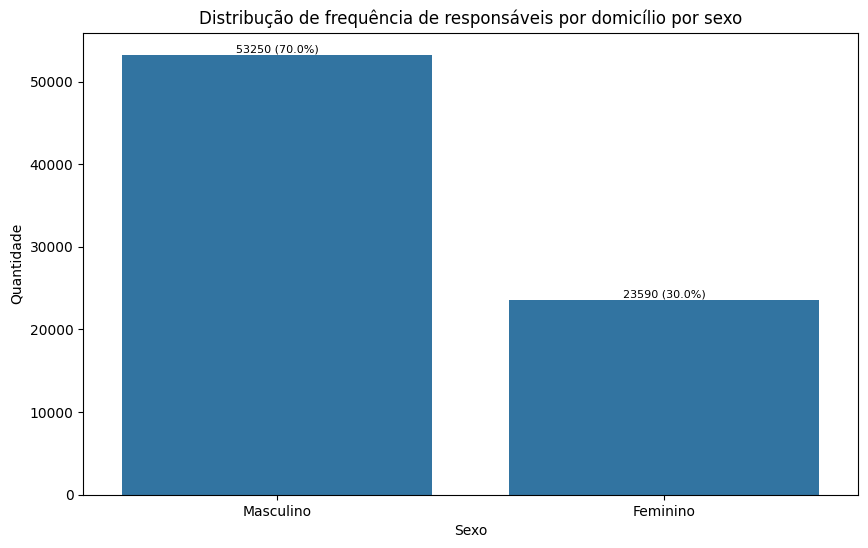

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=tab_freq_sexo, x='Sexo', y='Quantidade')
plt.title("Distribução de frequência de responsáveis por domicílio por sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
for index, row in tab_freq_sexo.iterrows():
  plt.text(index, row['Quantidade'] + 0.1, f"{row['Quantidade']} ({row['Porcentagem(%)']:.1f}%)",
           ha='center', va='bottom', fontsize=8)
plt.show()

#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [27]:
tab_freq_abs_sexo_cor = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'])
tab_freq_abs_sexo_cor

Cat.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [28]:
tab_freq_rel_sexo_cor = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], normalize='columns')*100
tab_freq_rel_sexo_cor = round(tab_freq_rel_sexo_cor, 2)
tab_freq_rel_sexo_cor

Cat.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,71.71,69.76,65.57,66.76,69.76
Feminino,28.29,30.24,34.43,33.24,30.24


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [29]:
renda_media = round(pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], values=dados['Renda'], aggfunc='mean'), 2)
renda_media

Cat.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Escreva suas conclusões aqui...

-  A pesquisa releva que 70% dos responsáveis por domicílios são homens
- A pesquisa revela que este padrão contínua válido quando analisamos as frequências em cada etnia, sendo mais significativa entre Indígenas
- A pesquisa releva que em sua maioria, homens responsáveis por domicílio ganham mais em média que mulheres responsáveis por domicílio em todas as etnias, exceto na Indígena.

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [30]:
resumo_renda = {
    'media': float(dados['Renda'].mean()),
    'mediana': float(dados['Renda'].median()),
    'moda': float(dados['Renda'].mode()[0])
}
resumo_renda

{'media': 2000.3831988547631, 'mediana': 1200.0, 'moda': 788.0}

#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [31]:
dados_renda = dados.groupby('UF').agg(media=('Renda', 'mean'))
dados_renda = round(dados_renda, 2)
dados_renda = dados_renda.sort_values(by='media', ascending=False)
tab_top5_renda = dados_renda.head(5).reset_index()
tab_top5_renda

,UF,media
0,Distrito Federal,4241.95
1,São Paulo,2638.10
2,Rio de Janeiro,2496.40
3,Paraná,2493.87
4,Santa Catarina,2470.85


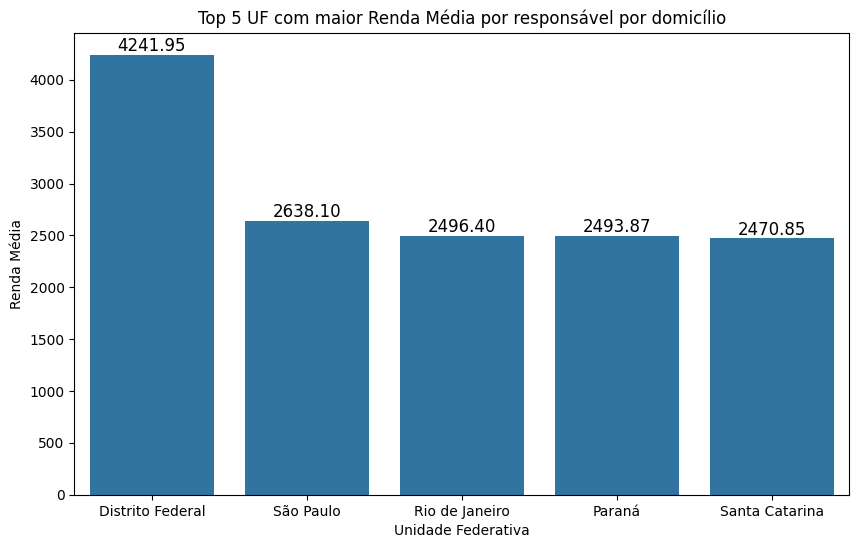

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(tab_top5_renda, x='UF', y='media')
plt.title("Top 5 UF com maior Renda Média por responsável por domicílio")
plt.xlabel("Unidade Federativa")
plt.ylabel("Renda Média")
for index, row in tab_top5_renda.iterrows():
  plt.text(index, row['media'] + 0.02, f"{row['media']:.2f}",
           ha='center', va='bottom', fontsize=12)
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [33]:
#Filtrando os registros do Sudeste
UF_sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
tab_sudeste = dados[dados['UF'].isin(UF_sudeste)].reset_index()
tab_sudeste = tab_sudeste[['UF', 'Cat.Sexo', 'Renda']]
tab_sudeste

,UF,Cat.Sexo,Renda
0,Minas Gerais,Masculino,1600
1,Minas Gerais,Masculino,850
2,Minas Gerais,Masculino,1400
3,Minas Gerais,Masculino,1500
4,Minas Gerais,Masculino,1600
...,...,...,...
23292,São Paulo,Masculino,1500
23293,São Paulo,Masculino,1500
23294,São Paulo,Masculino,1100
23295,São Paulo,Feminino,1600


##### **Média**

In [34]:
tab_sudeste_renda_media = round(pd.crosstab(tab_sudeste['UF'],
                                            tab_sudeste['Cat.Sexo'],
                                            values=tab_sudeste['Renda'],
                                            aggfunc = 'mean'), 2)
tab_sudeste_renda_media

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,2129.32,1752.71
Minas Gerais,2283.16,1489.62
Rio de Janeiro,2777.55,1971.53
São Paulo,2947.74,1950.18


##### **Mediana**

In [35]:
tab_sudeste_renda_mediana = round(pd.crosstab(tab_sudeste['UF'],
                                            tab_sudeste['Cat.Sexo'],
                                            values=tab_sudeste['Renda'],
                                            aggfunc = 'median'), 2)
tab_sudeste_renda_mediana

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,1500.0,927.0
Minas Gerais,1400.0,900.0
Rio de Janeiro,1510.0,1040.5
São Paulo,1820.0,1200.0


##### **Renda Máxima**

In [36]:
tab_sudeste_renda_max = round(pd.crosstab(tab_sudeste['UF'],
                                            tab_sudeste['Cat.Sexo'],
                                            values=tab_sudeste['Renda'],
                                            aggfunc = 'max'), 2)
tab_sudeste_renda_max

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,40000,100000
Minas Gerais,100000,30000
Rio de Janeiro,200000,120000
São Paulo,80000,50000


In [37]:
resumo = {
    'media': float(round(tab_sudeste['Renda'].mean(), 2)),
    'mediana': float(round(tab_sudeste['Renda'].median(),2)),
    'moda': float(round(tab_sudeste['Renda'].mode()[0],2))
}
resumo

{'media': 2372.73, 'mediana': 1500.0, 'moda': 1500.0}

> #### Conclusões

- A renda é uma variável que possui comportamento assimétrico a direita, pois valores muito altos puxam a média para cima, fazendo om que ela seja superior a moda e a mediana.
- No Sudeste, a diferença de renda média entre homens e mulheres é gritante


#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

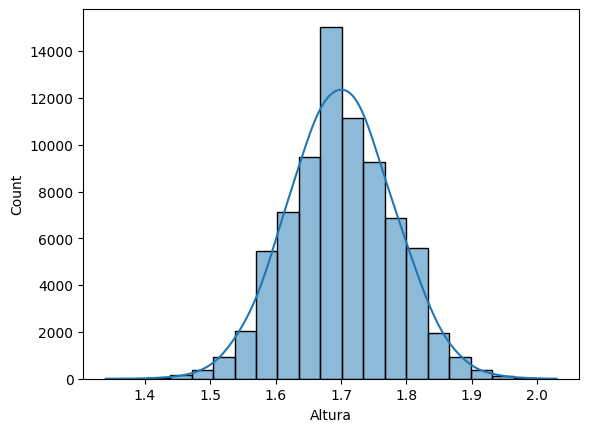

In [38]:
sns.histplot(bins=21, data=dados, x='Altura', kde= True, kde_kws=({'bw_adjust':2}))
plt.show()

In [39]:
resumo_altura = {
    'media': float(round(dados.Altura.mean(), 2)) ,
    'mediana': float(round(dados.Altura.median(), 2)),
    'moda': float(round(dados.Altura.mode()[0], 2))
}
resumo_altura

{'media': 1.7, 'mediana': 1.7, 'moda': 1.7}

> #### Conclusões

- No estudo foram selecionadas pessoas cujas alturas ao serem analizadas por frequência, formam um gráfico simétrico, uma curva normal - o que quer dizer que não há muitas pessoas muito baixas ou muito altas, fazendo com que a media, mediana e moda sejam iguais

##### **Idade**

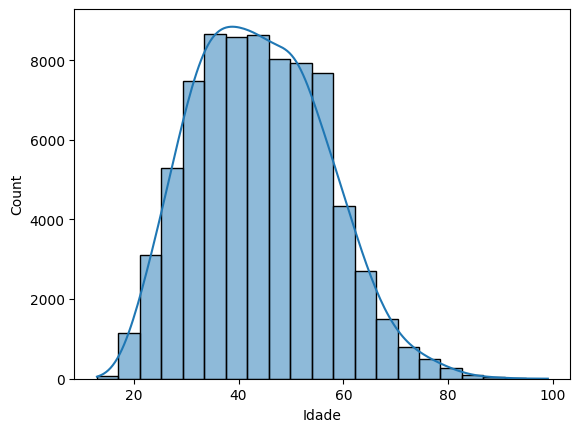

In [40]:
sns.histplot(bins=21, data=dados, x='Idade', kde= True, kde_kws=({'bw_adjust':2}))
plt.show()

In [41]:
resumo_idade = {
    'media': float(round(dados.Idade.mean(), 2)) ,
    'mediana': float(round(dados.Idade.median(), 2)),
    'moda': float(round(dados.Idade.mode()[0], 2))
}
resumo_idade

{'media': 44.07, 'mediana': 43.0, 'moda': 40.0}

> #### Conclusões

- Por se tratar de um estudo de pessoas responsáveis por domicílio, é esperado que a frequência seja menor ou nula antes dos 20 anos.
- Como há pessoas mais velhas, muito mais que a moda(40 anos), a curva será assimétrica a direita, e a média de idade será puxada para cima, por conta disso.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [42]:
import math
def sturges(data: pd.DataFrame):
  n = len(data)
  k = 1+(10/3)*math.log10(n)
  return round(k)
dados_filtrados = dados[dados['Renda'] <= 15000]
k = sturges(dados_filtrados)
k

17

In [43]:
dados['Renda'].describe()

,Renda
count,76840.000000
mean,2000.383199
std,3323.387730
min,0.000000
25%,788.000000
50%,1200.000000
75%,2000.000000
max,200000.000000


In [44]:
len(dados)

76840

In [45]:
len(dados_filtrados)

76219

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [46]:
faixas = dados_filtrados.copy()

faixas['faixa_renda'] = pd.cut(faixas['Renda'], bins=k, include_lowest=True)

faixas.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,faixa_renda
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"


In [47]:
tabela_frequencias = faixas.groupby('faixa_renda',observed=False ).size().reset_index(name='frequencia')

tabela_frequencias['porcentagem'] = (tabela_frequencias['frequencia'] / len(faixas)) * 100

tabela_frequencias

,faixa_renda,frequencia,porcentagem
0,"(-15.001, 882.353]",26311,34.520264
1,"(882.353, 1764.706]",25816,33.870820
2,"(1764.706, 2647.059]",10905,14.307456
3,"(2647.059, 3529.412]",4854,6.368491
4,"(3529.412, 4411.765]",2133,2.798515
5,"(4411.765, 5294.118]",2180,2.860179
6,"(5294.118, 6176.471]",1002,1.314633
7,"(6176.471, 7058.824]",672,0.881670
8,"(7058.824, 7941.176]",208,0.272898
9,"(7941.176, 8823.529]",554,0.726853


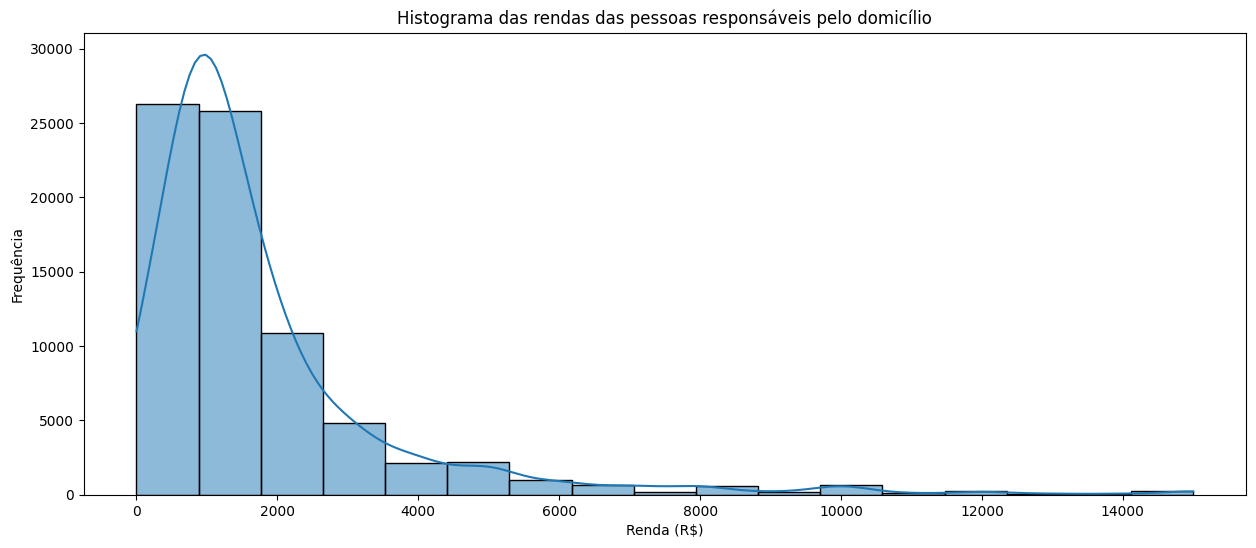

In [48]:
plt.figure(figsize=(15,6))
sns.histplot(data=dados_filtrados, x=dados_filtrados['Renda'], bins=k, kde=True, kde_kws={'bw_adjust': 2})
plt.title('Histograma das rendas das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

> #### Conclusões

- O gráfico é assimétrico a direita, o que significada que a concentração de pessoas se localiza nos menores salarios

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [49]:
n = len(dados)
dados_salario_min = dados[dados['Renda']<=788]
porcentual = round(((len(dados_salario_min)/n)*100),2)
porcentual

28.87

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [50]:
dados['Renda'].quantile(0.95)

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [51]:
dados['Renda'].quantile(0.99)

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [52]:
dados_filtrados = dados[dados['Renda']<=6000]
quartis = {
    'Q1': dados_filtrados['Renda'].quantile(0.25),
    'Q2': dados_filtrados['Renda'].quantile(0.50),
    'Q3': dados_filtrados['Renda'].quantile(0.75)
}
quartis

{'Q1': np.float64(788.0), 'Q2': np.float64(1200.0), 'Q3': np.float64(2000.0)}

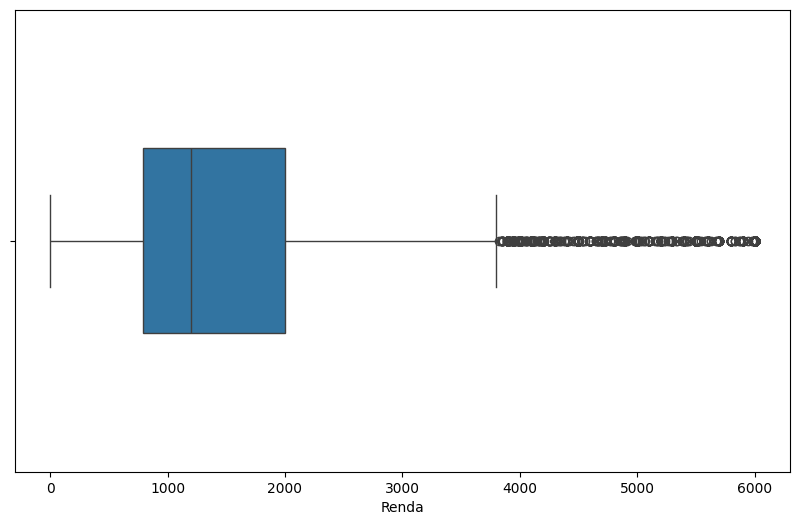

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dados_filtrados, x=dados_filtrados['Renda'])
plt.ylim(-1, 1)
plt.show()

In [54]:
dados_filtrados['Renda'].describe()

,Renda
count,73193.000000
mean,1491.327545
std,1198.146161
min,0.000000
25%,788.000000
50%,1200.000000
75%,2000.000000
max,6000.000000


> #### Conclusões

- A mediana dos salarios das pessoas que ganham até 6000 reais é de 1200 reais
- A faixa do segundo ao terceiro quartil vai de 788 reais à 2000 reais

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

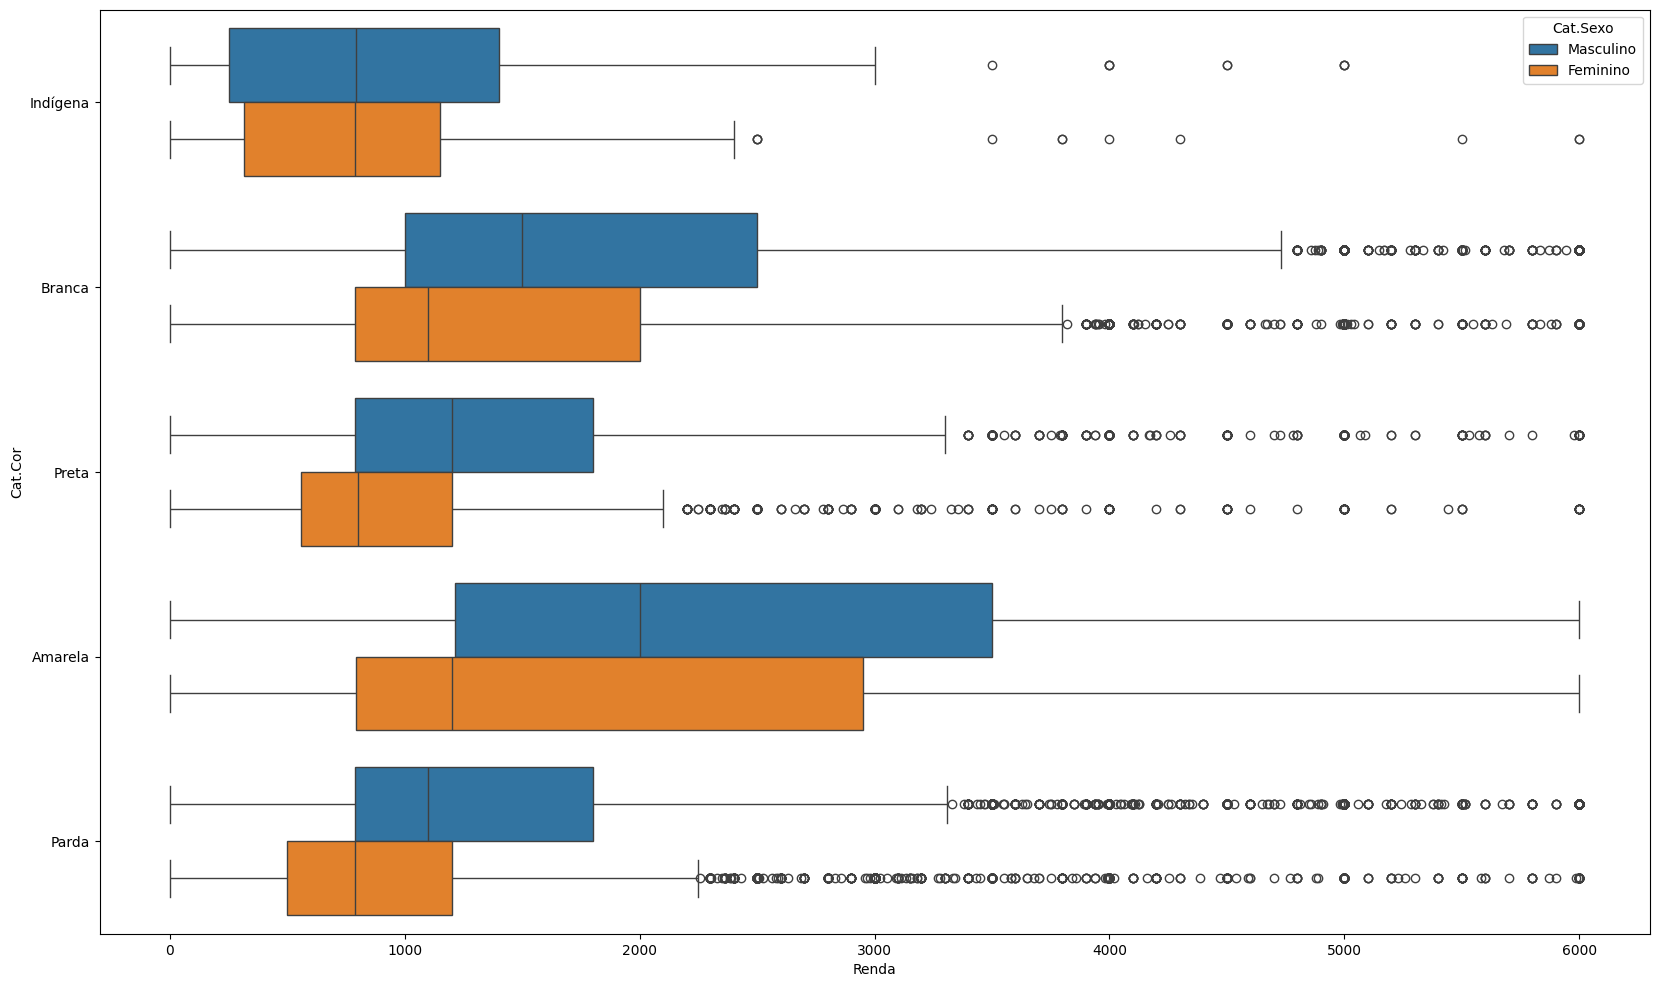

In [55]:
plt.figure(figsize=(20,12))
sns.boxplot(data=dados_filtrados, x=dados_filtrados['Renda'], y=dados_filtrados['Cat.Cor'], hue=dados_filtrados['Cat.Sexo'])
plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

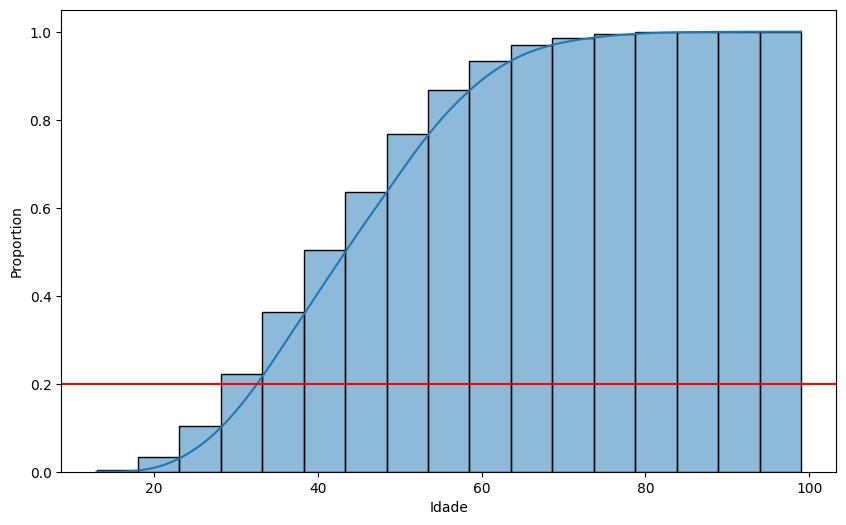

In [56]:
k = sturges(dados)
plt.figure(figsize=(10,6))
sns.histplot(data=dados, bins=k, x=dados['Idade'], stat='proportion', kde=True, cumulative=True)
plt.axhline(0.2, color='red')
plt.show()

In [57]:
idades_classificacao = dados.copy()
idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [58]:
idades_classificacao = idades_classificacao.sort_values(by='Idade', ascending=True)
idades_classificacao

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos
...,...,...,...,...,...,...,...,...,...,...
10899,Tocantins,0,92,8,1,0,1.68,Masculino,Parda,Sem instrução e menos de 1 ano
36162,Minas Gerais,0,94,2,4,0,1.80,Masculino,Branca,3 anos
1789,Acre,0,95,8,9,500,1.86,Masculino,Parda,8 anos
11834,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,Sem instrução e menos de 1 ano


In [59]:
n = len(idades_classificacao)
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1)/n
idades_classificacao['qualificacao'] = idades_classificacao['cumulativo'] <= 0.20
idades_classificacao

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,cumulativo,qualificacao
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10899,Tocantins,0,92,8,1,0,1.68,Masculino,Parda,Sem instrução e menos de 1 ano,0.999948,False
36162,Minas Gerais,0,94,2,4,0,1.80,Masculino,Branca,3 anos,0.999961,False
1789,Acre,0,95,8,9,500,1.86,Masculino,Parda,8 anos,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,Sem instrução e menos de 1 ano,0.999987,False


In [60]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificacao']==True]
idades_qualificados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,cumulativo,qualificacao
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True
...,...,...,...,...,...,...,...,...,...,...,...,...
37555,Minas Gerais,0,33,8,12,788,1.60,Masculino,Parda,11 anos,0.199948,True
18203,Rio Grande do Norte,1,33,4,9,600,1.66,Feminino,Preta,8 anos,0.199961,True
18199,Rio Grande do Norte,1,33,8,7,200,1.54,Feminino,Parda,6 anos,0.199974,True
22744,Pernambuco,0,33,4,6,805,1.63,Masculino,Preta,5 anos,0.199987,True


In [61]:
len(idades_qualificados)

15368

In [62]:
max(idades_qualificados['Idade'])

33

> #### Conclusões

- Os 20% mais jovens da base de dados representam as pessoas de 13 a 33 anos
- No gráfico, a idade 33 encontra-se no encontro da reta vermelha (delimita a faixa dos primeiros 20%) com a linha azul (linha de densidade)
- É preciso analisar a frequência relativa cumulativa para identificar os 20% mais jovens da análise, para isso foi preciso ordenar e utilizar o índice para comparar a posição na tabela com a porcentagem correspondente cumulativa.

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [65]:
estatisticas = dados['Renda'].agg(
    media='mean',
    mediana='median',
    variancia='var',
    desvio_padrao='std',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()
estatisticas['Renda'] = estatisticas['Renda'].apply(lambda x: f"{x:,.2f}")
estatisticas

,index,Renda
0,media,"2,000.38"
1,mediana,"1,200.00"
2,variancia,"11,044,906.01"
3,desvio_padrao,"3,323.39"
4,mad,"1,526.50"


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [69]:
estatisticas_anos_estudo = dados.groupby('Anos.de.Estudo')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std',
).reset_index()
estatisticas_anos_estudo

,Anos.de.Estudo,media,mediana,desvio_padrao
0,1,732.994187,600.0,955.274843
1,2,806.524496,700.0,1203.866292
2,3,842.560209,788.0,1298.873800
3,4,980.044275,788.0,1907.138437
4,5,1150.439293,900.0,1293.144934
5,6,1183.575683,940.0,1328.709017
6,7,1284.082618,1000.0,1326.140204
7,8,1289.166233,1000.0,1279.412081
8,9,1437.744862,1100.0,1404.280340
9,10,1315.685870,1000.0,1888.373952


> #### Conclusões

- Tendência geral: normalmente, quanto maior o número de anos de estudo, maior é a média e mediana da renda. Isso sugere uma correlação positiva entre escolaridade e renda.

- Diferença entre média e mediana: se a média estiver muito acima da mediana, indica assimetria à direita (existem rendas muito altas que puxam a média para cima).

- Desvio padrão:
Um desvio padrão alto mostra que os salários são muito variados naquele grupo de escolaridade.
Pode indicar desigualdade de rendimentos dentro de um mesmo nível de educação.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [70]:
filtragem = dados[dados['Renda']<=15000]
estatisticas_sexo = filtragem.groupby('Cat.Sexo')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std',
).reset_index()
estatisticas_sexo

<ipython-input-70-ad4e23c79ec0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas_sexo = filtragem.groupby('Cat.Sexo')['Renda'].agg(


,Cat.Sexo,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

1 - Média e Mediana maiores para homens:
Homens têm, em média, uma renda maior do que mulheres.
A mediana (valor central) também é mais alta para os homens, o que reforça que esse grupo tem tendência a receber salários mais altos.

2 - Assimetria (distribuição distorcida):
Para ambos os sexos, a média é maior que a mediana, o que indica que a distribuição da renda é assimétrica à direita — ou seja, há pessoas com rendas muito altas que estão elevando a média.
Isso é comum em análises de renda, pois há uma pequena parcela da população que ganha muito mais que a maioria.

3 - Desvio padrão elevado:
Tanto homens quanto mulheres apresentam grande dispersão nos valores de renda, mas essa dispersão é maior entre os homens.
Isso pode indicar uma maior desigualdade interna entre os homens — enquanto alguns têm rendas muito altas, outros têm rendas mais baixas.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [74]:
dados_filtrados = dados[(dados['Renda']<=10000) & (dados['UF'].isin(['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal']))]
dados_filtrados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
68068,Mato Grosso do Sul,0,53,2,12,1250,1.79,Masculino,Branca,11 anos
68069,Mato Grosso do Sul,0,19,2,9,764,1.75,Masculino,Branca,8 anos
68070,Mato Grosso do Sul,1,36,8,8,650,1.74,Feminino,Parda,7 anos
68071,Mato Grosso do Sul,0,31,2,9,5500,1.77,Masculino,Branca,8 anos
68072,Mato Grosso do Sul,1,51,8,6,400,1.82,Feminino,Parda,5 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


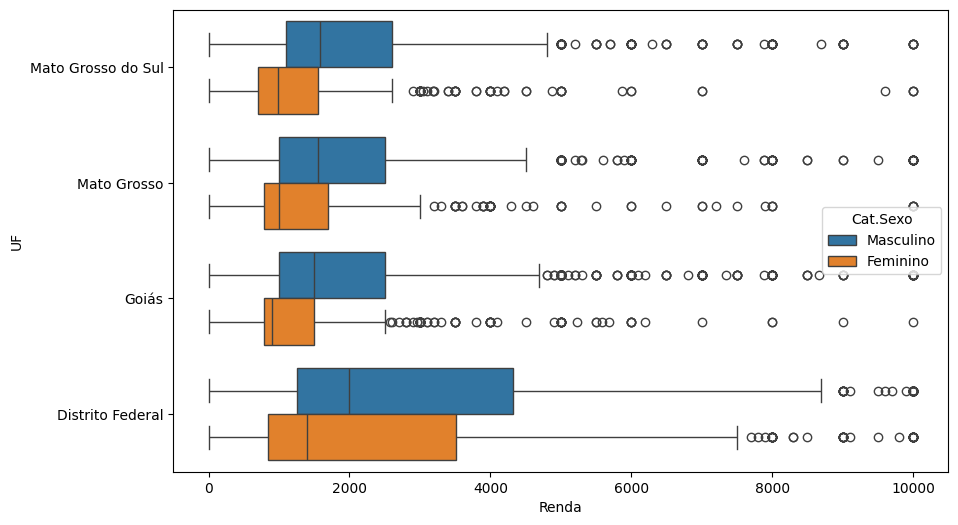

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dados_filtrados, x=dados_filtrados['Renda'], y=dados_filtrados['UF'], hue=dados_filtrados['Cat.Sexo'])
plt.show()

##### **Média**

In [79]:
media = round(dados_filtrados.groupby(['UF', 'Cat.Sexo'])['Renda'].mean(), 2)
media

<ipython-input-79-06abee104354>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media = round(dados_filtrados.groupby(['UF', 'Cat.Sexo'])['Renda'].mean(), 2)


UF                  Cat.Sexo 
Distrito Federal    Masculino    3138.46
                    Feminino     2551.87
Goiás               Masculino    2030.06
                    Feminino     1284.65
Mato Grosso         Masculino    2092.10
                    Feminino     1548.93
Mato Grosso do Sul  Masculino    2181.73
                    Feminino     1396.69
Name: Renda, dtype: float64

##### **Mediana**

In [81]:
mediana = round(dados_filtrados.groupby(['UF', 'Cat.Sexo'])['Renda'].median(), 2)
mediana

<ipython-input-81-41ac8f99a44b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana = round(dados_filtrados.groupby(['UF', 'Cat.Sexo'])['Renda'].median(), 2)


UF                  Cat.Sexo 
Distrito Federal    Masculino    2000.0
                    Feminino     1400.0
Goiás               Masculino    1500.0
                    Feminino      900.0
Mato Grosso         Masculino    1560.0
                    Feminino     1000.0
Mato Grosso do Sul  Masculino    1576.0
                    Feminino      986.0
Name: Renda, dtype: float64

##### **Desvio Padrão**

In [82]:
desvio_padrao = round(dados_filtrados.groupby(['UF', 'Cat.Sexo'])['Renda'].std(), 2)
desvio_padrao

<ipython-input-82-77fec6278a35>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desvio_padrao = round(dados_filtrados.groupby(['UF', 'Cat.Sexo'])['Renda'].std(), 2)


UF                  Cat.Sexo 
Distrito Federal    Masculino    2513.43
                    Feminino     2451.17
Goiás               Masculino    1587.38
                    Feminino     1110.00
Mato Grosso         Masculino    1707.91
                    Feminino     1508.59
Mato Grosso do Sul  Masculino    1773.44
                    Feminino     1400.90
Name: Renda, dtype: float64

> #### Conclusões

Em geral, homens tendem a ganhar mais, e a unidade federativa com maior dispersão de renda é o Distrito Federal. Os outros estados possuem números bem parecidos entre homens e mulheres.